#K-Nearest Neighbors (KNN) Classifier

Objective: Build a KNN classifier to predict class labels based on two features using synthetic data. Evaluate model performance using confusion matrix and decision boundary plot.


#✅ Step 1: Import Required Libraries

In [20]:
# Import core Python libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn modules
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score, roc_curve, auc
)

# Set seaborn style for prettier plots
sns.set(style="whitegrid")


#🧪 Step 2: Generate Synthetic Classification Data

In [21]:
# Create synthetic data for binary classification with 2 features
X, y = make_classification(
    n_samples=200,        # total samples
    n_features=2,         # only 2 features (good for plotting)
    n_redundant=0,        # no redundant features
    n_clusters_per_class=1,
    weights=[0.5, 0.5],   # balanced classes
    class_sep=1.5,        # how well-separated the classes are
    random_state=42       # for reproducibility
)

# Convert to DataFrame for visualization
df = pd.DataFrame(X, columns=["Feature_1", "Feature_2"])
df["Target"] = y

# Show first 5 rows
df.head()


,Feature_1,Feature_2,Target
0,-0.372929,0.513042,1
1,1.812935,3.270534,1
2,2.840428,2.920996,1
3,2.794548,0.095620,1
4,1.444105,0.977241,1


#📊 Step 3: Visualize the Dataset

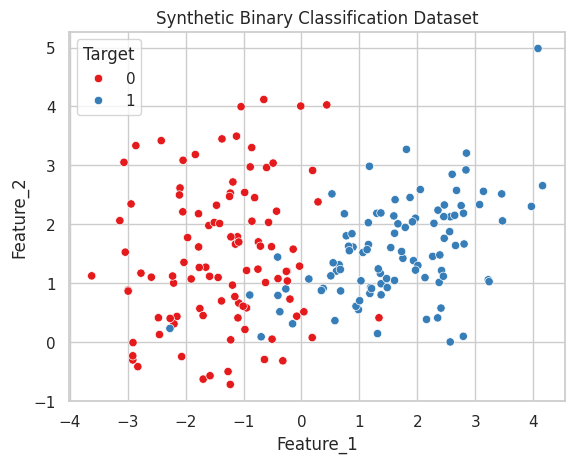

In [22]:
# Plot the two features colored by target class
sns.scatterplot(data=df, x="Feature_1", y="Feature_2", hue="Target", palette="Set1")
plt.title("Synthetic Binary Classification Dataset")
plt.show()


#🔀 Step 4: Split and Scale the Data

In [23]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Standardize features for better KNN performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#🤖 Step 5: Train the KNN Classifier



In [24]:
# Initialize KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train on scaled training data
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

#✅ Step 6: Make Predictions and Evaluate Performance



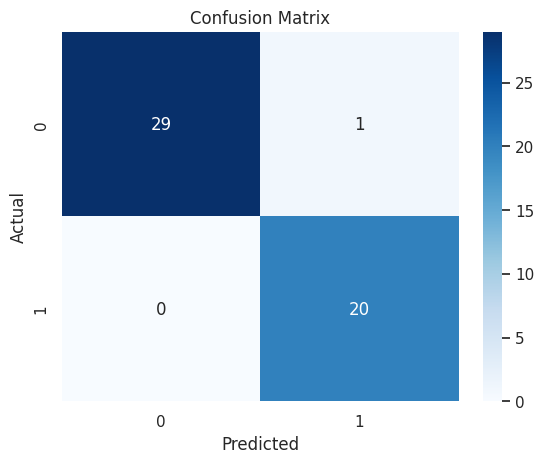

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        30
           1       0.95      1.00      0.98        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

✅ Accuracy: 0.98


In [25]:
# Predict on test data
y_pred = knn.predict(X_test_scaled)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {acc:.2f}")


#📈 Step 7: Plot Decision Boundary

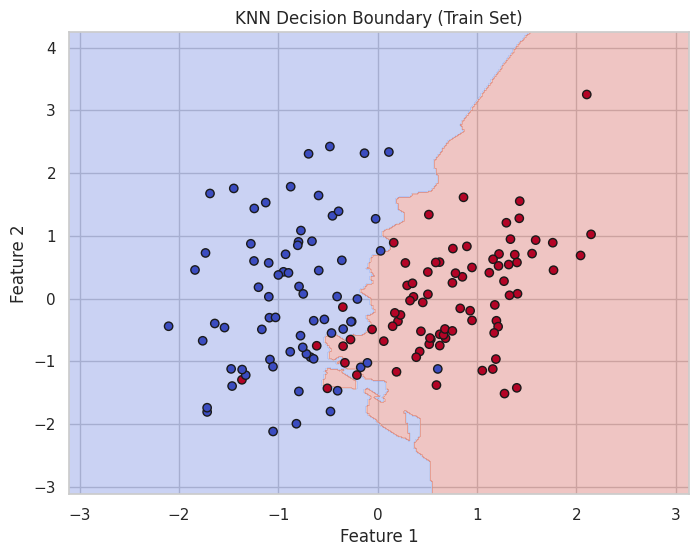

In [26]:
# Create a mesh grid for plotting decision boundary
h = 0.02
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class probabilities across the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision surface
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolor='k', cmap='coolwarm')
plt.title("KNN Decision Boundary (Train Set)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


#📉 Step 8: Plot ROC Curve (Optional for Binary)

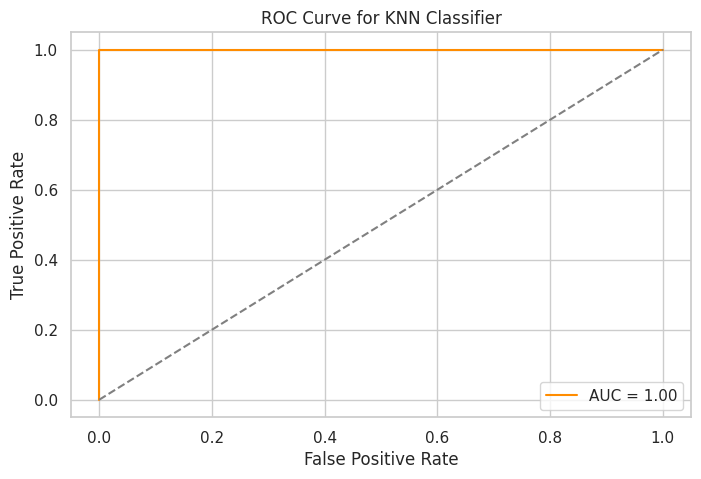

In [27]:
# Only do ROC if binary classification
y_proba = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle='--', color="gray")
plt.title("ROC Curve for KNN Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


#📋 Summary
KNN is a lazy learner; it memorizes training data.

Sensitive to feature scaling.

Used make_classification for easy synthetic data.

Plotted confusion matrix, decision boundary, and ROC curve.